# Data Science Project Steps

1. Define the Research problem and questions
2. Analyze data by descriptive statistics and graphical visualization.
3. Prepare data by using relevant preprocessing transformations, data cleaning, 
    data standardization,deaing with null and outlier values. Divide data into test and training set.
4. Fit the train data to model. 
5. Predict the test data.
6. Evaluate the first algorithm and its model performance.
7. Evaluate the current algorithm and variety of algorithms by creating test harness for diverse
    algorithms in conjunction with resampling techniques like cross validation, variable importance.
    bootstrapping.Improve Result by playing with hyperparameters and innovative methods like 
   ensembles.
8. Choose the best model and present the results. 

## 1. Define the Research problem and questions

**Research Questions:**  

    1.Predict Risk using Age,Cholesterol,Number_Blood_Vessels_Calcified, and Chest Pain Type?


In [1]:
# Import required packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix

## 2. Analyze data by descriptive statistics and graphical visualization.

In [2]:
# Filter warnings 
import warnings
warnings.filterwarnings('ignore')

# Read the data, print the shape and first 5 rows.
heartattackData = pd.read_csv('HeartAttack.csv')
print(heartattackData.shape)
print(heartattackData.head())


(270, 14)
   Age  Sex  Chest_Pain_Type   BP  Cholesterol  Fasting_Blood_MoreThan_120  \
0   70    1                4  130          322                           0   
1   67    0                3  115          564                           0   
2   57    1                2  124          261                           0   
3   64    1                4  128          263                           0   
4   74    0                2  120          269                           0   

   Resting_Electrocardiographic_Reading  Maximum_Heart_Rate   \
0                                     2                  109   
1                                     2                  160   
2                                     0                  141   
3                                     0                  105   
4                                     2                  121   

   Exercise_Induced_Angina  Old_Peak  Slope  Number_Blood_Vessels_Calcified  \
0                        0       2.4      2              

In [3]:
heartattackData

,Age,Sex,Chest_Pain_Type,BP,Cholesterol,Fasting_Blood_MoreThan_120,Resting_Electrocardiographic_Reading,Maximum_Heart_Rate,Exercise_Induced_Angina,Old_Peak,Slope,Number_Blood_Vessels_Calcified,thal,Risk
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


In [4]:
# Print the summary of the data

print(heartattackData.describe())
print(heartattackData.describe().T)

              Age         Sex  Chest_Pain_Type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  131.344444   249.659259   
std      9.109067    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   280.000000   
max     77.000000    1.000000         4.000000  200.000000   564.000000   

       Fasting_Blood_MoreThan_120  Resting_Electrocardiographic_Reading  \
count                  270.000000                            270.000000   
mean                     0.148148                              1.022222   
std                      0.355906                              0.997891   
min                     

In [5]:
# Pritn the datatypes which are keys.
types = heartattackData.dtypes
print(types)
print("Keys of heartattackData dataset:\n", heartattackData.keys())

Age                                       int64
Sex                                       int64
Chest_Pain_Type                           int64
BP                                        int64
Cholesterol                               int64
Fasting_Blood_MoreThan_120                int64
Resting_Electrocardiographic_Reading      int64
Maximum_Heart_Rate                        int64
Exercise_Induced_Angina                   int64
Old_Peak                                float64
Slope                                     int64
Number_Blood_Vessels_Calcified            int64
thal                                      int64
Risk                                      int64
dtype: object
Keys of heartattackData dataset:
 Index(['Age', 'Sex', 'Chest_Pain_Type', 'BP', 'Cholesterol',
       'Fasting_Blood_MoreThan_120', 'Resting_Electrocardiographic_Reading',
       'Maximum_Heart_Rate ', 'Exercise_Induced_Angina', 'Old_Peak', 'Slope',
       'Number_Blood_Vessels_Calcified', 'thal', 'Risk'],
      

In [6]:
# print the target variable

print("Risk:", heartattackData['Risk'])

Risk: 0      2
1      1
2      2
3      1
4      1
      ..
265    1
266    1
267    1
268    1
269    2
Name: Risk, Length: 270, dtype: int64


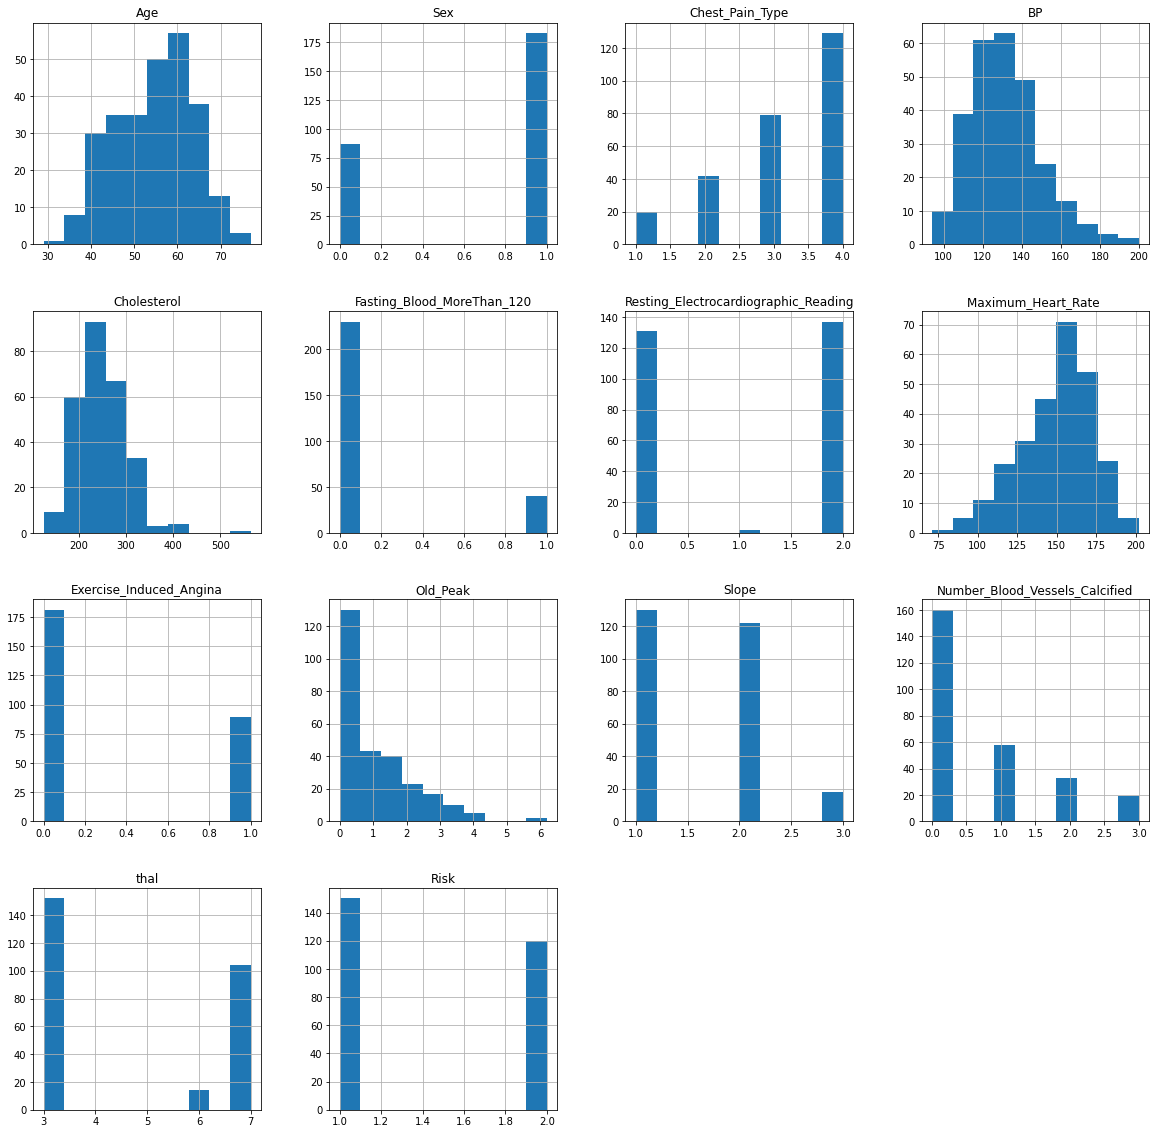

In [7]:
# Create the histogram of all the variables.

%matplotlib inline
heartattackData.hist(figsize = (20,20))
plt.show()

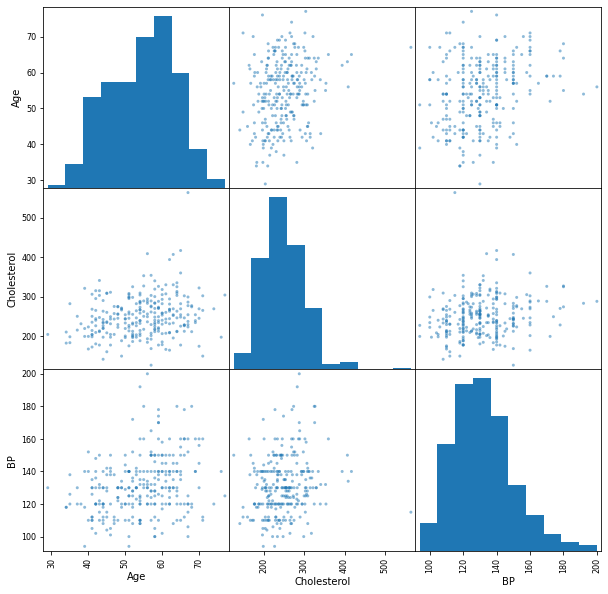

In [8]:
# create a grid of scatterplot and histogram

%matplotlib inline
X = heartattackData[['Age','Cholesterol','BP']] 
y = heartattackData[['Risk']]
from pandas.plotting import scatter_matrix
scatter_matrix(X,figsize=(10, 10))
plt.show() 

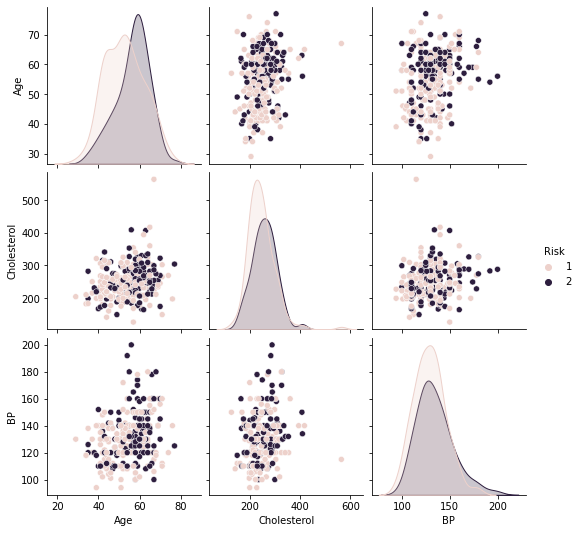

In [9]:
# Creating a pairplot differentiatied by Risk

%matplotlib inline
X = heartattackData[['Age','Cholesterol','BP','Risk']] 
from pandas.plotting import scatter_matrix
sns.pairplot(X, hue = 'Risk')
plt.show() 

## 3. Prepare data by using relevant preprocessing transformations, data cleaning, data standardization,deaing with null and outlier values.



In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Divide data into predictor features vector and the label of the target variable 'Risk'

X = heartattackData[['Age','Cholesterol','Number_Blood_Vessels_Calcified','Chest_Pain_Type']] 
y = heartattackData[['Risk']]

# Check if null values in the columns
X.isna().sum()


Age                               0
Cholesterol                       0
Number_Blood_Vessels_Calcified    0
Chest_Pain_Type                   0
dtype: int64

## 4 Divide data into test an training set and Standardization.

In [11]:
# Dividing data into two subsets training and test set.Training set trains the model
# X train: predictive variables in train set y train: train labels
# X test: predictive variables in test set y test test labels

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Data normalization  

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (216, 4)
y_train shape: (216, 1)
X_test shape: (54, 4)
y_test shape: (54, 1)


## 5. Fit the train data and predict for test data

In [12]:
# Initiating the scikit learn instance and fit is used to train the model.The predict() function 
# implements prediction.It takes test data as an argument and returns predicted labels. Fitting 
#the k-NN classiifer
# np.ravel() converts labels from a column format to the expected row format and flattens 
# the numpy.ndarray.

import numpy as np

from sklearn.neighbors import KNeighborsClassifier
# Setting the number of neighbors
classifier = KNeighborsClassifier(n_neighbors=10)
# Loading the training set
classifier.fit(X_train, np.ravel(y_train,order='C'))

# Predicting the test labels
y_pred = classifier.predict(X_test)
y_pred

array([2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1,
       1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 1, 1], dtype=int64)

## 6. Evaluate the first algorithm and its model performance.

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
# creating confusion matrix and printing the classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy =  accuracy_score(y_test,y_pred)*100
print(accuracy)


[[25  7]
 [ 7 15]]
              precision    recall  f1-score   support

           1       0.78      0.78      0.78        32
           2       0.68      0.68      0.68        22

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54

74.07407407407408


## 7.a) Performance Improvement techniques:k values

[0.7777777777777778, 0.7962962962962963, 0.7407407407407407, 0.7777777777777778, 0.7592592592592593, 0.7962962962962963, 0.7777777777777778, 0.7592592592592593, 0.7777777777777778, 0.7407407407407407, 0.7037037037037037, 0.7407407407407407, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7407407407407407, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7407407407407407, 0.7407407407407407, 0.7407407407407407, 0.7407407407407407, 0.7407407407407407, 0.7407407407407407, 0.7222222222222222, 0.7407407407407407, 0.7407407407407407, 0.7407407407407407, 0.7222222222222222, 0.7407407407407407, 0.7592592592592593, 0.7222222222222222, 0.7407407407407407, 0.7222222222222222, 0.7592592592592593, 0.7592592592592593, 0.7407407407407407, 0.7592592592592593]


Text(0, 0.5, 'Testing Accuracy')

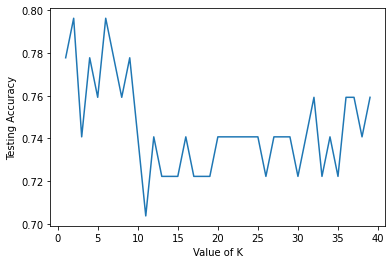

In [14]:
k_range = range(1, 40)

# Creating a Python dictionary by [] and then appending the accuracy scores

scores = []
#  looping through the k range 1 to 40

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,np.ravel(y_train,order='C'))
    y_pred = knn.predict(X_test)
    # appending the accuracy scores in the dictionary named scores.
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)
# Printing the K number of neighbors and Testing Accuracy.
import matplotlib.pyplot as plt

# This command allow plots to appear within the notebook
%matplotlib inline
plt.plot(k_range, scores)
plt.xlabel('Value of K')
plt.ylabel('Testing Accuracy')


## 7b). Performance Improvement techniques cross validation

In [15]:
# Optimizing the k-nn by using Cross validation

from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=15)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

#train model with cv of 10
cv_scores = cross_val_score(knn_cv, X, np.ravel(y,order='C'), cv=10)
#print each cv score (accuracy) and average them
print(cv_scores)
print(np.mean(cv_scores))

[0.66666667 0.74074074 0.66666667 0.85185185 0.85185185 0.85185185
 0.66666667 0.77777778 0.85185185 0.81481481]
0.7740740740740741


## 7c). Performance Improvement techniques cross validation: k values and crossvalidation

In [16]:
# Using cross validation with all possible k values.

from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Train with 10 fold cross validation by an outer k value ranges and nested cross validation scores.
X = scaler.transform(X)
scores = []
k_range = range(1, 40)
for k in k_range:
#train model with cv of 10
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_cv, X, np.ravel(y,order='C'), cv=10)
#print each cv score (accuracy) and average them
    print(k)
    print(cv_scores)
    print(np.mean(cv_scores))
    
# Prediction     
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train,np.ravel(y_train,order='C'))
y_pred = knn.predict(X_test)
accuracy_scores = metrics.accuracy_score(y_test, y_pred) 
print(accuracy_scores) 



1
[0.59259259 0.74074074 0.7037037  0.81481481 0.85185185 0.74074074
 0.77777778 0.66666667 0.7037037  0.81481481]
0.7407407407407408
2
[0.62962963 0.7037037  0.7037037  0.77777778 0.85185185 0.74074074
 0.74074074 0.7037037  0.74074074 0.77777778]
0.737037037037037
3
[0.62962963 0.7037037  0.77777778 0.77777778 0.77777778 0.81481481
 0.81481481 0.7037037  0.74074074 0.74074074]
0.7481481481481481
4
[0.62962963 0.74074074 0.77777778 0.85185185 0.81481481 0.81481481
 0.77777778 0.77777778 0.74074074 0.81481481]
0.774074074074074
5
[0.74074074 0.77777778 0.77777778 0.81481481 0.85185185 0.81481481
 0.7037037  0.74074074 0.77777778 0.81481481]
0.7814814814814814
6
[0.7037037  0.81481481 0.77777778 0.85185185 0.81481481 0.81481481
 0.66666667 0.81481481 0.77777778 0.81481481]
0.7851851851851852
7
[0.77777778 0.81481481 0.74074074 0.85185185 0.85185185 0.81481481
 0.66666667 0.81481481 0.81481481 0.81481481]
0.7962962962962963
8
[0.74074074 0.85185185 0.77777778 0.85185185 0.81481481 0.8148

## 7d). Performance Improvement techniques: Feature Importance

     Age  Sex  Chest_Pain_Type   BP  Cholesterol  Fasting_Blood_MoreThan_120  \
0     70    1                4  130          322                           0   
1     67    0                3  115          564                           0   
2     57    1                2  124          261                           0   
3     64    1                4  128          263                           0   
4     74    0                2  120          269                           0   
..   ...  ...              ...  ...          ...                         ...   
265   52    1                3  172          199                           1   
266   44    1                2  120          263                           0   
267   56    0                2  140          294                           0   
268   57    1                4  140          192                           0   
269   67    1                4  160          286                           0   

     Resting_Electrocardiographic_Readi

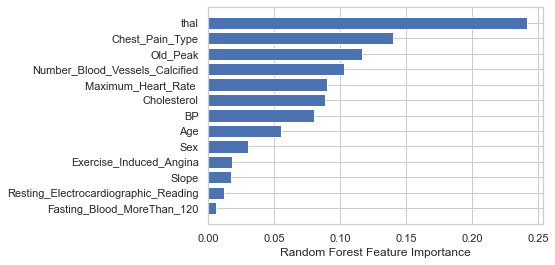

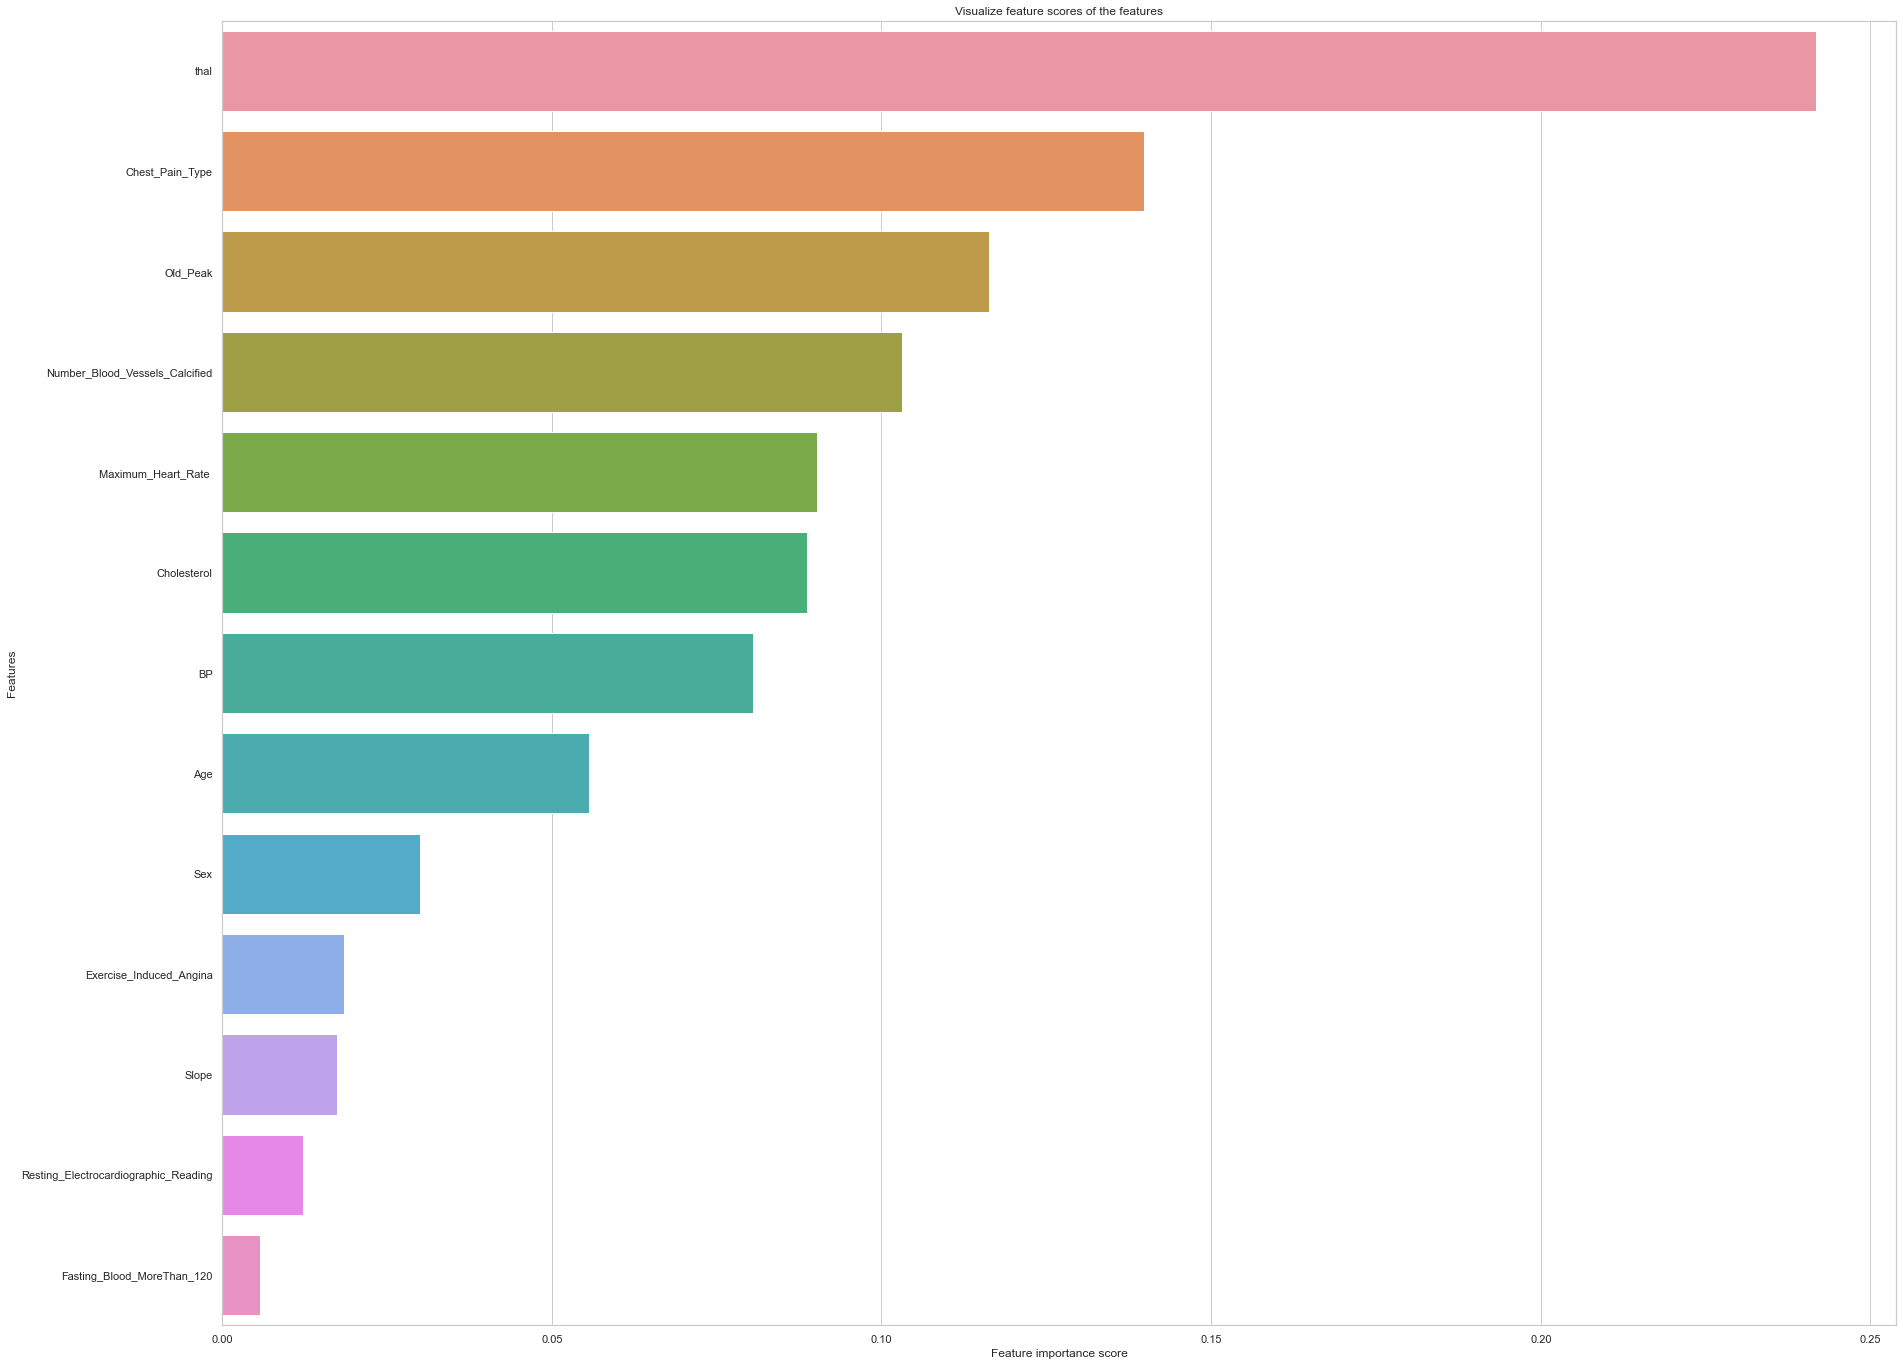

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid")
from matplotlib import pyplot as plt


# overriding the default figure size and font size.
# plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
# plt.rcParams.update({'font.size': 14})


heartattackData = pd.read_csv('HeartAttack.csv')
X = pd.DataFrame(heartattackData)
X = X.iloc[:,0:13]
print(X)


y = heartattackData['Risk']
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

# Generating the importance of predictive variables using Random Forest
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_
print(rf.feature_importances_)
# Sorting them in descending order
sorted_idx = rf.feature_importances_.argsort()
# Printing feature scores
plt.barh(X_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

print(sorted_idx)

# alternate way of viewing the feature scores in descending order

feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print(feature_scores)
# f, ax represents  figure f and the axes.
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=heartattackData.T)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()



In [18]:
# Using a subset of predictor feature variables for the classification:

from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#create a new KNN model

from sklearn.preprocessing import StandardScaler
from sklearn import metrics

heartattackData_Optimize = pd.read_csv('HeartAttack.csv')
# Remove spaces in the column names
heartattackData_Optimize.columns = heartattackData_Optimize.columns.to_series().apply(lambda x: x.strip())
X = heartattackData_Optimize[['thal','Cholesterol','Old_Peak','Chest_Pain_Type','Number_Blood_Vessels_Calcified','BP','Maximum_Heart_Rate']] 
y = heartattackData_Optimize[['Risk']]

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
scores = []
k_range = range(1, 40)
for k in k_range:
#train model with cv of 10
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_cv, X, np.ravel(y,order='C'), cv=10)
#print each cv score (accuracy) and average them
    print(k)
    print(cv_scores)
    print(np.mean(cv_scores))
    
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,np.ravel(y_train,order='C'))
y_pred = knn.predict(X_test)
accuracy_scores = metrics.accuracy_score(y_test, y_pred) 
print(accuracy_scores)  

1
[0.74074074 0.77777778 0.74074074 0.74074074 0.77777778 0.85185185
 0.66666667 0.81481481 0.85185185 0.74074074]
0.7703703703703704
2
[0.7037037  0.77777778 0.7037037  0.66666667 0.77777778 0.74074074
 0.66666667 0.88888889 0.88888889 0.81481481]
0.762962962962963
3
[0.7037037  0.81481481 0.81481481 0.7037037  0.92592593 0.85185185
 0.66666667 0.85185185 0.85185185 0.77777778]
0.7962962962962964
4
[0.74074074 0.77777778 0.81481481 0.74074074 0.92592593 0.81481481
 0.74074074 0.92592593 0.85185185 0.77777778]
0.8111111111111111
5
[0.74074074 0.81481481 0.85185185 0.74074074 0.92592593 0.74074074
 0.74074074 0.88888889 0.85185185 0.77777778]
0.8074074074074075
6
[0.81481481 0.74074074 0.85185185 0.74074074 0.92592593 0.74074074
 0.74074074 0.88888889 0.88888889 0.81481481]
0.8148148148148147
7
[0.77777778 0.81481481 0.81481481 0.77777778 0.88888889 0.74074074
 0.77777778 0.92592593 0.92592593 0.74074074]
0.8185185185185185
8
[0.81481481 0.81481481 0.85185185 0.77777778 0.88888889 0.740

## 8. Evaluating Algorithms: Train versus Test, Error Rates

Max train score 100.0 % and k = [1]
Max test score 72.05882352941177 % and k = [7, 9]


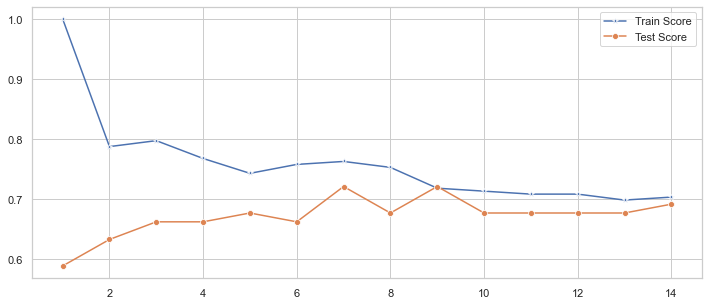

In [19]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    
## Training Evaluation
max_train_score = max(train_scores)

# # Store the max train test score index by enumerating through all the scores.

train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]

# Store the max score in the first curly parenthesis and the indices in the second.
# The lambda function takes the index starting at zero therefore one is added to get the k value.

print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

## Testing Evaluation
max_test_score = max(test_scores)

test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

## Train Test Evaluation by comparative graph.
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

Text(0, 0.5, 'Mean Error')

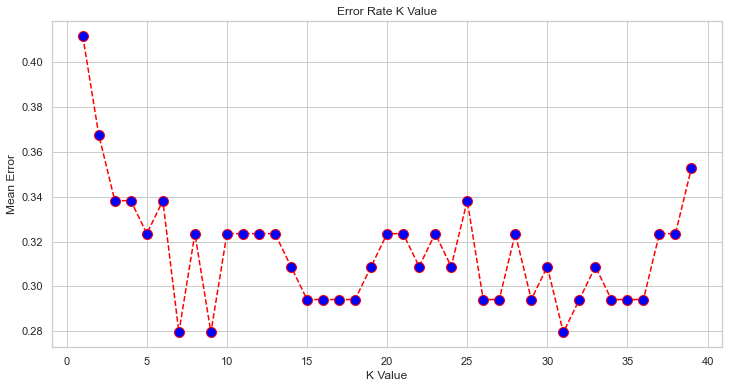

In [20]:
## Error Rate Graph
# Create an empty dictionary to collect errors across the different k-values
error = []

# Iterate throught k=1 to 40  and run the classifier.Predict and append the error for each iteration.
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

    # Create a plot of Mean error versus kvalue.
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [22]:
X_test

,Age,Sex,Chest_Pain_Type,BP,Cholesterol,Fasting_Blood_MoreThan_120,Resting_Electrocardiographic_Reading,Maximum_Heart_Rate,Exercise_Induced_Angina,Old_Peak,Slope,Number_Blood_Vessels_Calcified,thal
16,46,1,4,140,311,0,0,120,1,1.8,2,2,7
34,50,1,4,144,200,0,2,126,1,0.9,2,0,7
11,53,1,4,142,226,0,2,111,1,0.0,1,0,7
78,42,0,3,120,209,0,0,173,0,0.0,2,0,3
52,65,0,3,140,417,1,2,157,0,0.8,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,65,0,3,155,269,0,0,148,0,0.8,1,0,3
236,53,0,4,138,234,0,2,160,0,0.0,1,0,3
32,37,0,3,120,215,0,0,170,0,0.0,1,0,3
199,77,1,4,125,304,0,2,162,1,0.0,1,3,3


In [23]:
pred_i

array([2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1,
       1, 1], dtype=int64)

In [24]:
y_test

16     2
34     2
11     1
78     1
52     1
      ..
247    1
236    1
32     1
199    2
23     1
Name: Risk, Length: 68, dtype: int64